# Explore here

Import the necessary libraries

In [2]:
# Your code here
import pandas as pd 
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from pickle import dump

Load the data

In [3]:
housing_ds = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv')
housing_ds.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Keeping the necessary columns

In [4]:
colx = ['HouseAge', 'AveRooms', 'AveBedrms', 'Population','AveOccup', 'MedHouseVal']
filter_data = housing_ds.drop(colx, axis= 1)
filter_data

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


##Train an unsupervised model

In [5]:
X = filter_data
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 28)

model_km = KMeans(n_clusters = 6, random_state = 28)
model_km.fit(X_train)
model_km.labels_

/workspace/.pyenv_mirror/user/current/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([5, 3, 4, ..., 4, 3, 2], dtype=int32)

Save the new labels as Cluster

In [6]:
y_train = model_km.labels_.tolist()
X_train["Cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,Cluster
18387,8.1988,37.23,-121.89,5
7709,6.8564,33.95,-118.14,3
5812,1.2188,34.13,-118.26,4
11944,4.5122,33.93,-117.43,3
11403,3.9929,33.73,-117.92,4


Plot the train data

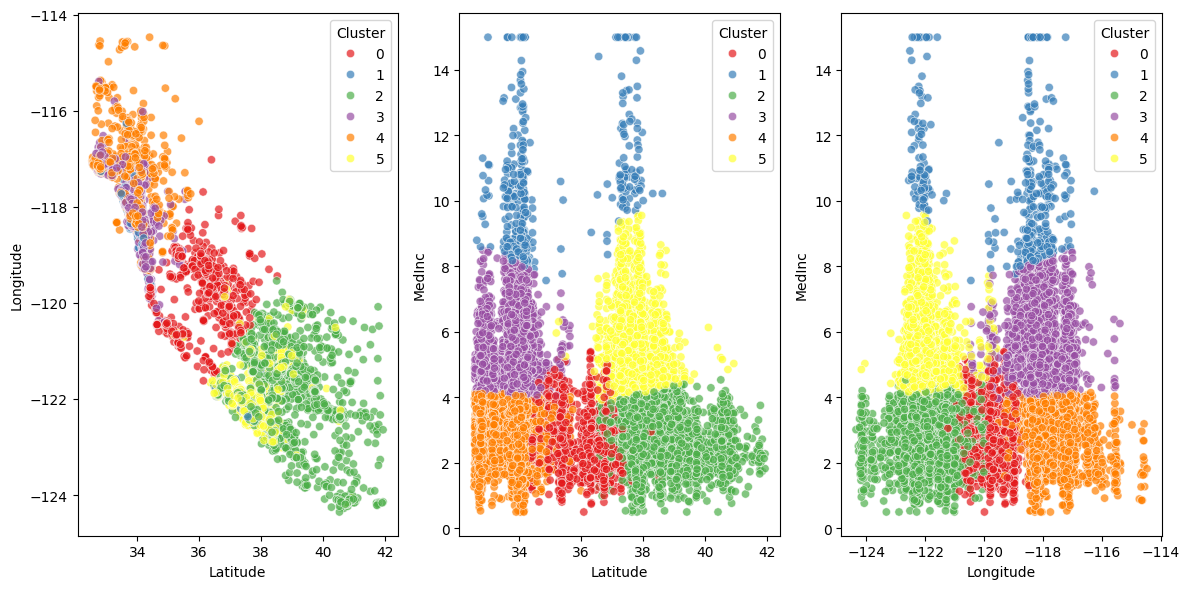

In [7]:
fig, axis = plt.subplots(1, 3, figsize=(12, 6))

# Plot the data
sns.scatterplot(ax=axis[0], data=X_train, x='Latitude', y='Longitude', hue= 'Cluster', palette='Set1', alpha=0.7)
sns.scatterplot(ax=axis[1], data=X_train, x='Latitude', y='MedInc', hue= 'Cluster', palette='Set1', alpha=0.7)
sns.scatterplot(ax=axis[2], data=X_train, x='Longitude', y='MedInc', hue= 'Cluster', palette='Set1', alpha=0.7)

plt.tight_layout()

plt.show()

Predict with the test data

In [8]:
pred_test = model_km.predict(X_test)
y_test = pred_test.tolist()
X_test["Cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,Cluster
5179,1.6389,33.95,-118.26,4
11988,3.2067,34.00,-117.51,4
9522,1.9032,39.14,-123.21,2
18792,2.8036,40.61,-122.57,2
17209,2.3454,34.43,-119.72,0


In [9]:
X_train['Cluster'] = X_train['Cluster'].astype('category')
X_test['Cluster'] = X_test['Cluster'].astype('category')

In [10]:
print(X_train[['Cluster']].head())
print(X_test[['Cluster']].head())


      Cluster
18387       5
7709        3
5812        4
11944       3
11403       4
      Cluster
5179        4
11988       4
9522        2
18792       2
17209       0


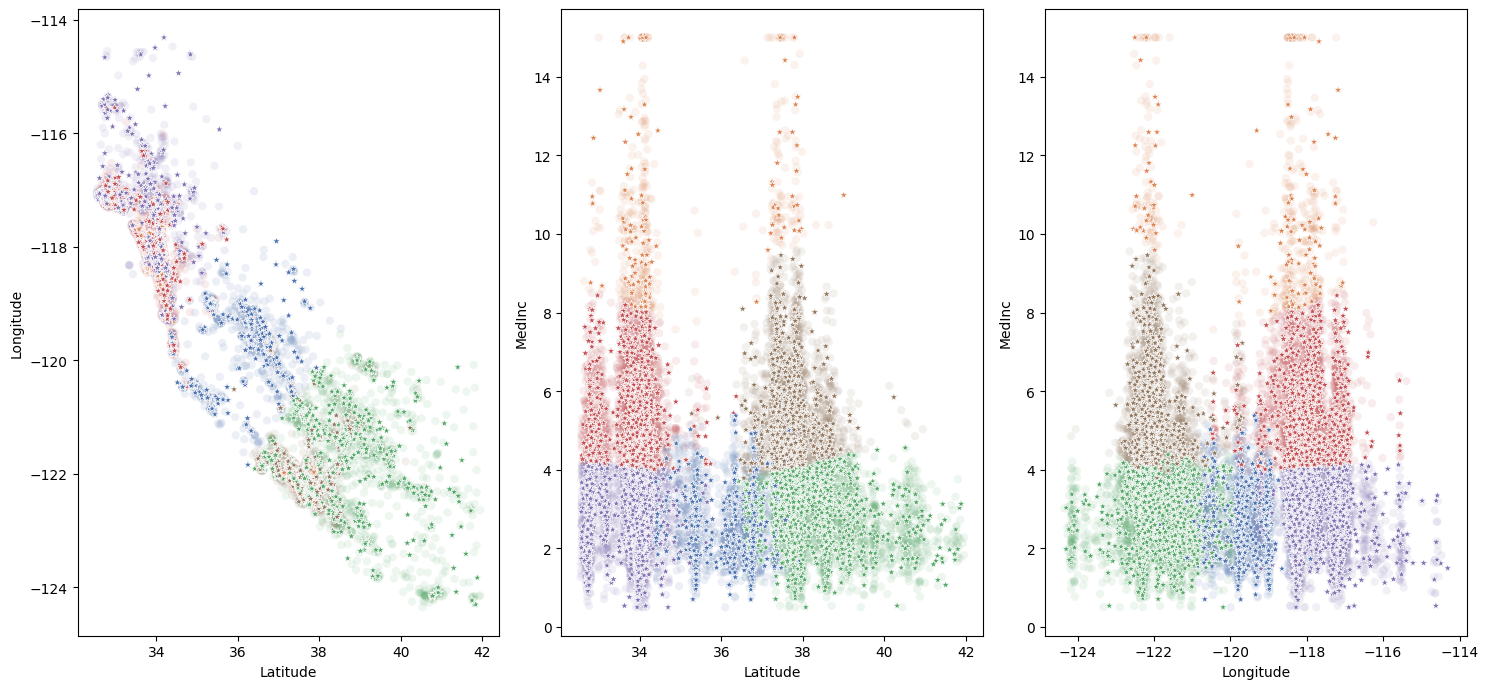

In [11]:
fig, axis = plt.subplots(1, 3, figsize = (15, 7))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "deep", alpha  = 0.1, legend= None)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep", alpha  = 0.1, legend= None)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "deep", alpha  = 0.1, legend= None)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "Cluster", palette = "deep", marker = "*", legend= None)
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "Cluster", palette = "deep", marker = "*", legend= None)
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "Cluster", palette = "deep", marker = "*", legend= None)

plt.tight_layout()
plt.show()

As this plot shows, there is a great accuracy in the prediction test.

## Train a supervised model

In [36]:
model_dt = DecisionTreeClassifier(random_state = 28)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=28)

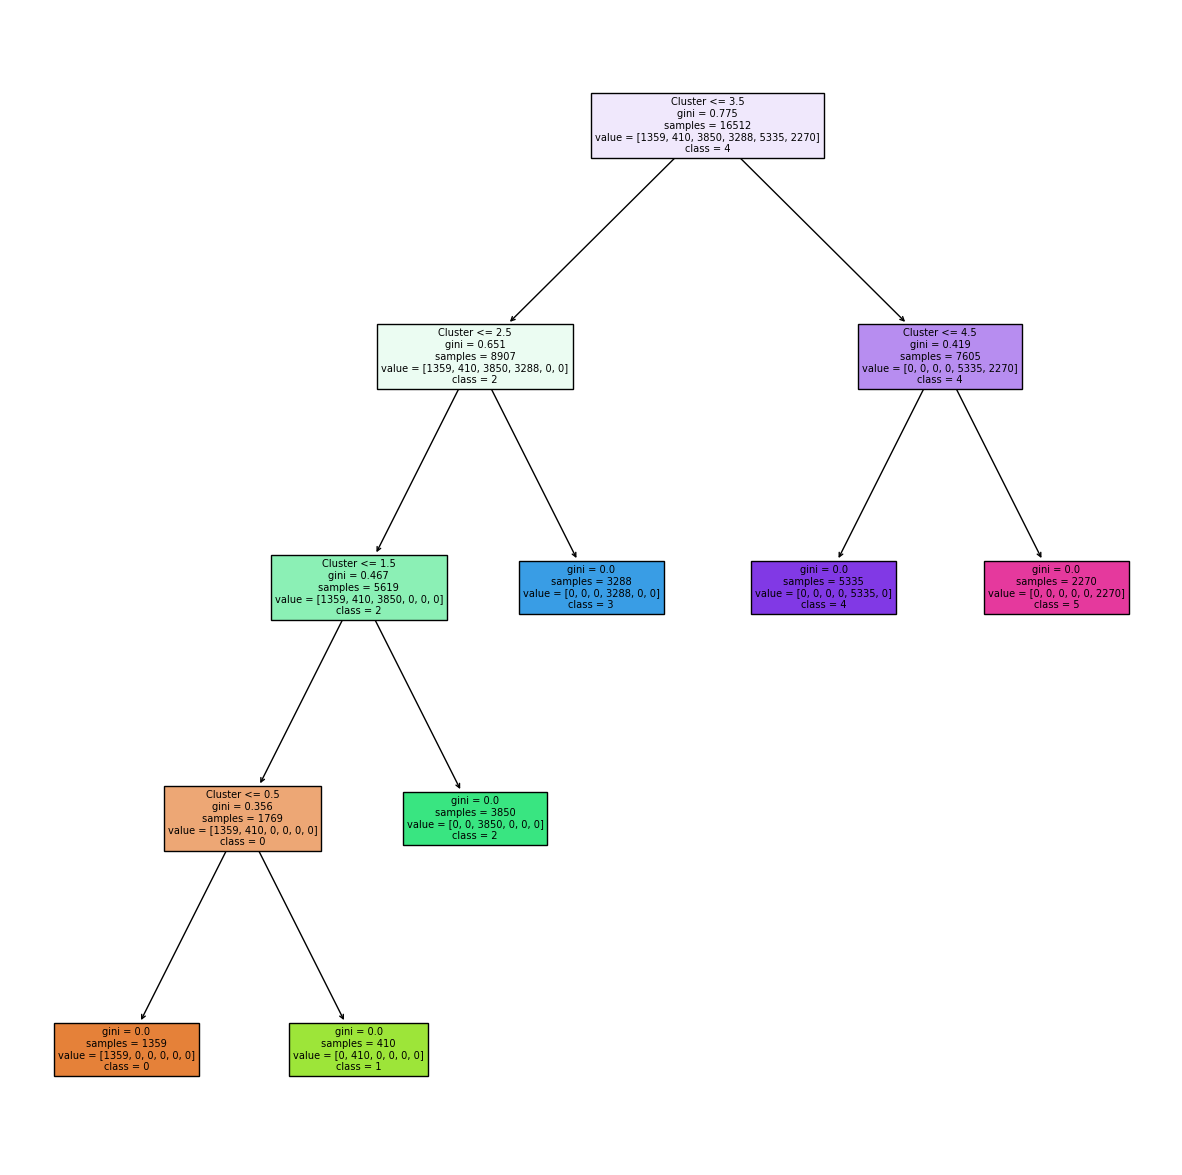

In [39]:
fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_dt, feature_names = list(X_train.columns), class_names = ["0", "1", "2", "3", "4", "5"], filled = True)

plt.show()

Check the accuracy score

In [42]:
y_pred = model_dt.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

Saving the two model

In [45]:
dump(model_km, open("/workspace/k-means/models/k-means_n_clusters-6_28.sav", "wb"))
dump(model_dt, open("/workspace/k-means/models/decision_tree_classifier_default_28.sav", "wb"))

## Conclution:
As the results shows, our models have a great accuracy. 